# Evaluate Runtime
Plot the runtime as a function of molecule size

In [1]:
%matplotlib inline 
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
import re

## Load Results
Get the runtime from the log files and store the number of heavy atoms.

In [2]:
logs = list(Path('runs/').rglob('runtime.log'))
print(f'Found {len(logs)} runs')

Found 201 runs


In [7]:
def summarize_log(path: Path) -> dict:
    """Get the size of the molecule and the runtime"""

    # Get the chemical formula
    summary = {
        'formula': path.parent.name
    }

    # Count the heavy atoms
    heavy_count = 0
    for elem, amount in re.findall(r'([A-Z][a-z]?)(\d*)', summary['formula']):
        if elem != "H":
            heavy_count += int(amount or 1)
    summary['heavy_count'] = heavy_count

    # Load the runtime
    with path.open() as fp:
        for line in fp:
            # Get the first occurance
            if 'Runtime:' in line:
                summary['runtime'] = float(line.split()[-1][:-1])
                break
        else:
            print(f'{path} not finished')
    return summary
            

In [8]:
all_runs = pd.DataFrame([summarize_log(c) for c in logs])
all_runs.head()

,formula,heavy_count,runtime
0,C7H4F4,11,6.17
1,C10H14OS,12,12.33
2,C7H6O3,10,6.89
3,C4H5N,5,6.22
4,C4H11NO,6,6.17


Print summaries

In [9]:
all_runs.describe()

,heavy_count,runtime
count,201.000000,201.000000
mean,10.860697,15.179602
std,3.435185,13.792676
min,4.000000,4.390000
25%,10.000000,6.420000
50%,11.000000,8.810000
75%,12.000000,19.240000
max,26.000000,84.270000


## Runtime vs Size
Plot how the size of the molecule affects the count

Text(0, 0.5, 'Runtime')

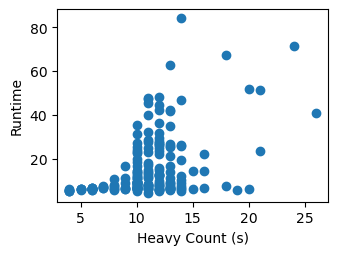

In [10]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.scatter(all_runs['heavy_count'], all_runs['runtime'])

ax.set_xlabel('Heavy Count (s)')
ax.set_ylabel('Runtime')